In [6]:
import pandas as pd 
import numpy as np 

In [7]:
#отображение всего датафрейма
pd.set_option('display.max_rows', None)

In [8]:
#отключить отображение всего датафрейма
pd.reset_option('display.max_rows')

In [24]:
df_train = pd.read_csv('./new_data/train_accident_normalized_text.csv')
df_test = pd.read_csv('./new_data/test_accident_normalized_text.csv')
print(df_train, df_test)

      Unnamed: 0  origin_id   
0           5853       8364  \
1            140        201   
2           7050      10101   
3           2589       3717   
4           5658       8070   
...          ...        ...   
5043        6520       9324   
5044        1874       2693   
5045        6563       9391   
5046        2190       3138   
5047         333        480   

                                        text_normalized  target  
0                               ruin holiday wordk zmne       0  
1         awwww airplane accident gon na die cuties job       1  
2                    think typhoon just passed here lol       1  
3     flood people dead house destroyed kaduna peopl...       1  
4                                length rescue cat need       0  
...                                                 ...     ...  
5043  help survive zombie apocalypse zombie fun run ...       0  
5044                              men crush fucking day       0  
5045      setsuko thurlow survive

In [10]:
print(df_test.dtypes)
print(df_train.dtypes)

Unnamed: 0          int64
origin_id           int64
text_normalized    object
target              int64
dtype: object
Unnamed: 0          int64
origin_id           int64
text_normalized    object
target              int64
dtype: object


In [11]:
df_combine = pd.read_csv('./new_data/combine_accident_normalized_text.csv')
df_combine

,Unnamed: 0,origin_id,text_normalized,target
0,0,1,deed reason earthquake may allah forgive,1
1,1,4,forest fire near ronge sask canada,1
2,2,5,resident asked shelter place being notified of...,1
3,3,6,people receive wildfire evacuation order calif...,1
4,4,7,just photo ruby alaska smoke wildfire pours sc...,1
...,...,...,...,...
6725,7601,10859,breaking refugio oil spill may costlier bigger...,1
6726,7602,10860,siren just went wasn forney tornado warning,1
6727,7603,10862,official say quarantine place alabama home pos...,1
6728,7605,10864,flip side walmart bomb evacuate stay tuned blow,1


<Axes: xlabel='target'>

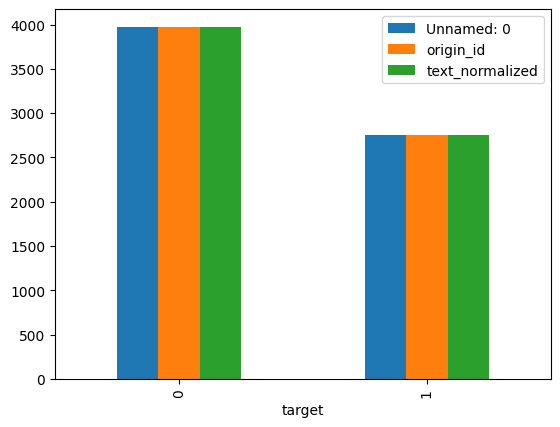

In [12]:
df_combine.groupby('target').count().plot(kind='bar')

In [25]:
import nltk
from nltk.tokenize import word_tokenize

from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
def tokenize(text):
  return [token for token in word_tokenize(text)]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [28]:
#Vectorization

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_train['text_normalized'])
y_train = df_train['target']
X_test = vectorizer.transform(df_test['text_normalized'])

In [29]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
#Splitting train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [31]:
# Train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
# Predict on validation set and calculate accuracy
from sklearn.metrics import accuracy_score

y_pred_val = lr_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy:', val_accuracy)

Validation accuracy: 0.7891089108910891


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%footer%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

<Axes: >

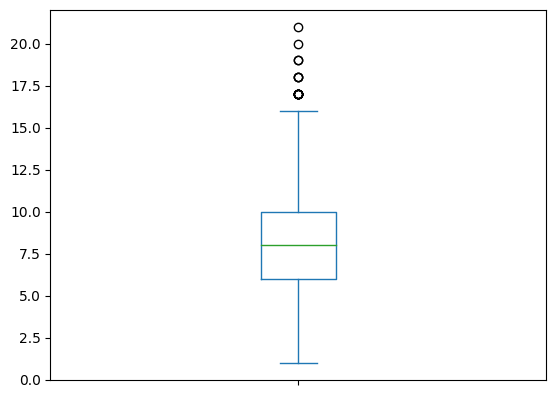

In [9]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df_combine['text_normalized']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

In [10]:
import re

In [11]:
import nltk  #natural language processing
from nltk.stem.porter import *

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [14]:
X = list(map(tweet_to_words, df_combine['text_normalized']))
y = df_combine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [15]:
print(len(X))
print(len(y))
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_val))
print(len(y_val))
print(X_train[0])
print(X_test[0])

6730
6730
3785
3785
1683
1683
1262
1262
['nurs', 'alert', 'emerg', 'depart', 'psychiatr', 'fte', 'day', 'provid', 'health', 'servic', 'olympia']
['ruin', 'holiday', 'wordk', 'zmne']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
# print first 200 words/tokens
print(count_vector.get_feature_names_out()[0:500])

['aaaaaand' 'abandon' 'abbott' 'abc' 'abe' 'abl' 'ablaz' 'abort' 'absolut'
 'abstorm' 'abus' 'acc' 'accept' 'access' 'accid' 'accident' 'accord'
 'account' 'acid' 'acoust' 'acr' 'across' 'act' 'action' 'activ' 'actual'
 'ad' 'adam' 'add' 'addict' 'address' 'administr' 'admit' 'adopt' 'adult'
 'advanc' 'adventur' 'advisori' 'affect' 'afghanistan' 'afp' 'afraid'
 'africa' 'african' 'afternoon' 'aftershock' 'age' 'agenc' 'agent'
 'aggress' 'ago' 'agre' 'ahead' 'ahh' 'aim' 'air' 'aircraft' 'airlin'
 'airplan' 'airport' 'aka' 'alabama' 'alarm' 'alberta' 'album' 'alcohol'
 'alert' 'alex' 'alien' 'aliv' 'allah' 'alleg' 'alli' 'allow' 'alon' 'alp'
 'altern' 'amageddon' 'amaz' 'amazon' 'ambul' 'america' 'american'
 'amsterdam' 'analysi' 'ancient' 'andrew' 'angel' 'anger' 'angri' 'anim'
 'animalrescu' 'ankl' 'annihil' 'anniversari' 'announc' 'annoy' 'annual'
 'answer' 'ant' 'anthrax' 'anti' 'antioch' 'anymor' 'anyway' 'anza'
 'apart' 'apc' 'apch' 'apocalyps' 'apocalypt' 'apollo' 'app' 'appar'
 '